<a href="https://colab.research.google.com/github/krishjagwani/DAV_72/blob/main/DAV_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [17]:
df = pd.read_csv("/content/IndianWeatherRepository.csv")
df.head()

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,12.6,18.5,1,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,10.7,14.2,1,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,2023-08-29 10:45,26.3,79.3,...,16.8,20.7,2,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,2023-08-29 10:45,25.6,78.1,...,4.9,6.6,1,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.2,81.0,...,11.4,14.8,1,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93


In [18]:
df = df[["location_name", "temperature_celsius","latitude"]]
df.head(10)

,location_name,temperature_celsius,latitude
0,Ashoknagar,27.5,24.57
1,Raisen,27.5,23.33
2,Chhindwara,26.3,22.07
3,Betul,25.6,21.86
4,Hoshangabad,27.2,22.75
5,Sehore,25.9,23.20
6,Jabalpur,28.0,23.17
7,Narsimhapur,27.7,22.95
8,Panna,30.0,24.72
9,Ujjain,26.0,23.18


In [20]:
df.tail()

,location_name,temperature_celsius,latitude
81591,Niwari,11.0,28.88
81592,Saitual,6.0,23.97
81593,Ranipet,20.1,12.93
81594,Tenkasi,27.0,8.97
81595,Pendra,23.3,21.93


In [21]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temperature_celsius,81596.0,19.766441,6.057376,-18.20,16.20,20.90,24.10,38.30
latitude,81596.0,23.097100,5.793642,7.17,20.27,23.95,26.77,34.57


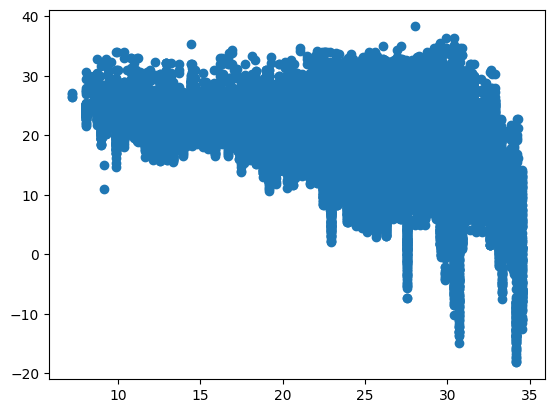

In [22]:
plt.scatter(df['latitude'], df['temperature_celsius'])

(array([   47.,   130.,   285.,  1243.,  3654., 13236., 25281., 32749.,
         4841.,   130.]),
 array([-18.2 , -12.55,  -6.9 ,  -1.25,   4.4 ,  10.05,  15.7 ,  21.35,
         27.  ,  32.65,  38.3 ]),
 <BarContainer object of 10 artists>)

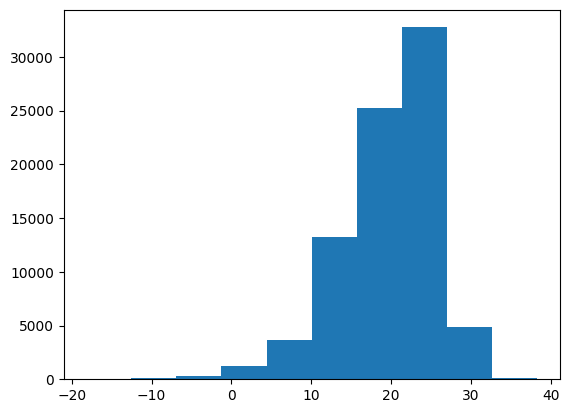

In [23]:
plt.hist(df["temperature_celsius"])

In [24]:
model = LinearRegression()
model.fit(df["temperature_celsius"].values.reshape(-1, 1), df["latitude"])

LinearRegression()

Text(0.01, 0.9, 'y = 31.764 + -0.438 * x')

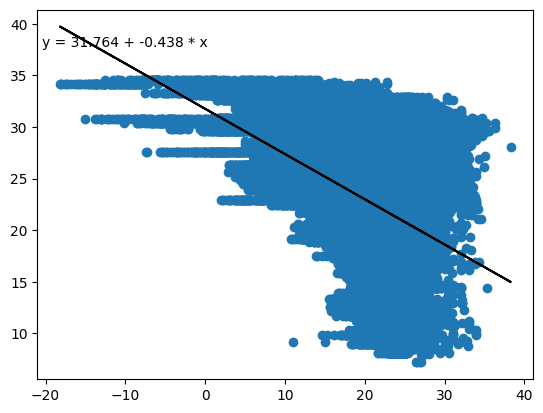

In [25]:
y_pred = model.predict(df["temperature_celsius"].values.reshape(-1, 1))
plt.scatter(df['temperature_celsius'], df['latitude'])
plt.plot(df["temperature_celsius"], y_pred, color="Black")
plt.text(0.01, 0.9, f"y = {round(model.intercept_, 3)} + {round(model.coef_[0], 3)} * x", transform=plt.gca().transAxes)

Simple Linear Regression in R

In [2]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [1]:
df <- read.csv("/content/IndianWeatherRepository.csv")

In [3]:
df = select(df,c("latitude", "temperature_celsius"))
head(df)

,latitude,temperature_celsius
,<dbl>,<dbl>
1,24.57,27.5
2,23.33,27.5
3,22.07,26.3
4,21.86,25.6
5,22.75,27.2
6,23.20,25.9


In [4]:
summary(df)

    latitude     temperature_celsius
 Min.   : 7.17   Min.   :-18.20     
 1st Qu.:20.27   1st Qu.: 16.20     
 Median :23.95   Median : 20.90     
 Mean   :23.10   Mean   : 19.77     
 3rd Qu.:26.77   3rd Qu.: 24.10     
 Max.   :34.57   Max.   : 38.30     

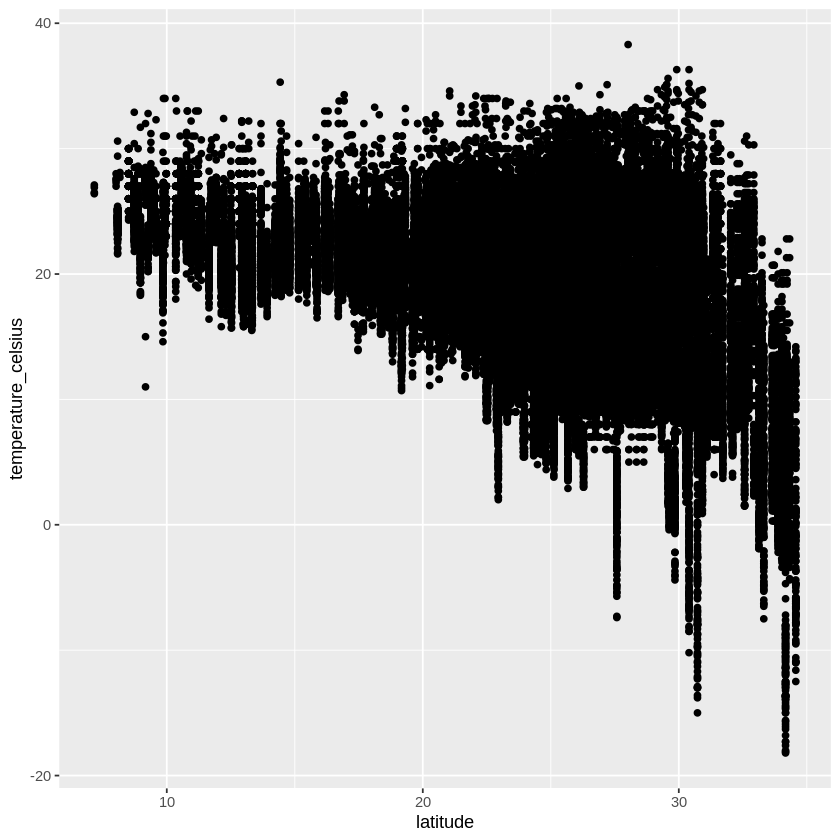

In [5]:
ggplot(df, aes(x=latitude, y=temperature_celsius)) +
    geom_point()

In [6]:
model = lm(temperature_celsius ~ latitude, data=df)
summary(model)


Call:
lm(formula = temperature_celsius ~ latitude, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.659  -3.335  -0.047   3.435  20.893 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.837228   0.077460   398.1   <2e-16 ***
latitude    -0.479315   0.003253  -147.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.383 on 81594 degrees of freedom
Multiple R-squared:  0.2102,	Adjusted R-squared:  0.2102 
F-statistic: 2.171e+04 on 1 and 81594 DF,  p-value: < 2.2e-16


In [7]:
pred <- predict(model, data = df$latitude)

[1] "y = 30.837228 + -0.479315 * x"

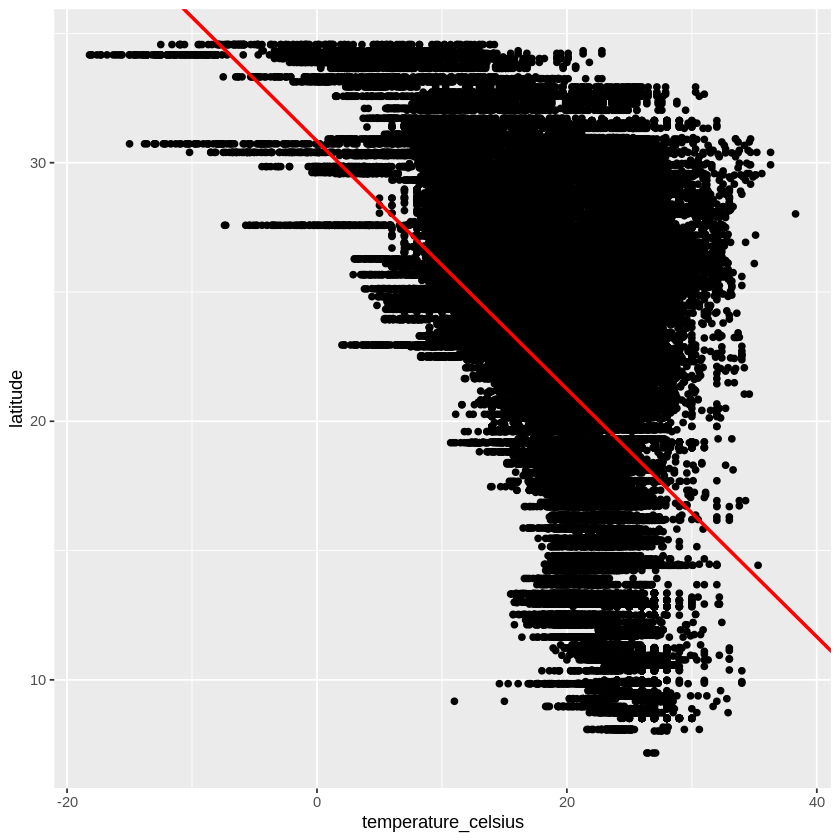

In [8]:
ggplot(df, aes(x=temperature_celsius, y=latitude)) +
    geom_point() +
      geom_abline(slope=model$coefficients[2],
              intercept=model$coefficients[1],
              color="Red",
              linewidth=1)
sprintf("y = %f + %f * x", model$coefficients[1], model$coefficients[2])